In [1]:
geo_id = 'US'

In [2]:
!pip install pytrends

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pytrends.request import TrendReq

import os
import time

from sklearn.linear_model import LinearRegression

In [4]:
list_primary_use = ['School',
                    'Education',
                     'Lodging',
                     'Office',
                     'Entertainment',
                     'Other',
                     'Retail',
                     'Parking',
                     'Public services',
                     'Warehouse',
                     'Food sales and service',
                     'Religious worship',
                     'Healthcare',
                     'Utility',
                     'Technology',
                     'Manufacturing',
                     'Services',
                     'residential',
                     'public assembly',
                     'storage',
                     'science',
                     'industrial']
list_software = ['microsoft office', 'Google docs', 'Email', 'Gmail']

In [5]:
df_suggs = pd.DataFrame()
for category in list_primary_use+list_software:
    try:
        print(category)
        pytrends = TrendReq(hl='en-US', tz=360)
        kw_list = [category]
        pytrends.build_payload(kw_list)
        suggs = pytrends.related_topics()
        df_temp = pd.DataFrame(suggs[category]['top'])
        df_temp['category'] = category
        df_suggs = pd.concat([df_suggs, df_temp],axis=0,ignore_index=True)
        print(df_temp)
        print('\n')    
    except:
        print('error')
        
    print('-------------------------------------------')

School
    value formattedValue  hasData  \
0     100            100     True   
1      13             13     True   
2       9              9     True   
3       4              4     True   
4       4              4     True   
5       2              2     True   
6       2              2     True   
7       1              1     True   
8       1              1     True   
9       1              1     True   
10      1              1     True   
11      0             <1     True   
12      0             <1     True   

                                              link      topic_mid  \
0        /trends/explore?q=/m/06zdj&date=today+5-y       /m/06zdj   
1      /trends/explore?q=/m/025tjcb&date=today+5-y     /m/025tjcb   
2        /trends/explore?q=/m/0bpgx&date=today+5-y       /m/0bpgx   
3       /trends/explore?q=/m/01xy6g&date=today+5-y      /m/01xy6g   
4      /trends/explore?q=/m/0j_2_6r&date=today+5-y     /m/0j_2_6r   
5       /trends/explore?q=/m/01d30f&date=today+5-y      /m/0

In [6]:
df_suggs = df_suggs.rename(columns={'topic_mid':'mid', 'topic_title':'title', 'topic_type':'type'})
df_suggs

,value,formattedValue,hasData,link,mid,title,type,category
0,100,100,True,/trends/explore?q=/m/06zdj&date=today+5-y,/m/06zdj,School,Topic,School
1,13,13,True,/trends/explore?q=/m/025tjcb&date=today+5-y,/m/025tjcb,Secondary school,School category,School
2,9,9,True,/trends/explore?q=/m/0bpgx&date=today+5-y,/m/0bpgx,High school in the United States,School category,School
3,4,4,True,/trends/explore?q=/m/01xy6g&date=today+5-y,/m/01xy6g,School district,Topic,School
4,4,4,True,/trends/explore?q=/m/0j_2_6r&date=today+5-y,/m/0j_2_6r,Primary school,School category,School
...,...,...,...,...,...,...,...,...
583,100,100,True,/trends/explore?q=/m/02q_bk&date=today+5-y,/m/02q_bk,Gmail,Topic,Gmail
584,3,3,True,/trends/explore?q=/m/02p9w51&date=today+5-y,/m/02p9w51,Google Account,Topic,Gmail
585,0,<1,True,/trends/explore?q=/m/03jqvf&date=today+5-y,/m/03jqvf,Session,Computer science,Gmail
586,0,<1,True,/trends/explore?q=/g/11b6pj515g&date=today+5-y,/g/11b6pj515g,Inbox by Gmail,Topic,Gmail


In [7]:
list_selected_title = ['Education',
                         'School',
                         'Secondary school',
                         'High school',
                         'School district',
                         'Primary school',
                         'Middle school',
                         'Lodging',
                         'Boarding house',
                         'Enterprise',
                         'Management',
                         'Career',
                         'Company',
                         'Employment',
                         'Retail',
                         'Shopping mall',
                         'Parking lot',
                         'Parking',
                         'Public service',
                         'Warehouse',
                         'Place of worship',
                         'Health Care',
                         'Utility',
                         'Technology',
                         'Organization',
                         'Manufacturing',
                         'Residential building',
                         'storage',
                         'Science',
                         'Microsoft Office',
                         'Microsoft Outlook',
                         'Microsoft Excel',
                         'Office 365',
                         'Google Docs',
                         'Google',
                         'Gmail',
                         'Google Classroom',
                         'Google Drive',
                         'Email']

df_suggs = df_suggs[df_suggs['title'].isin(list_selected_title)]
df_suggs = df_suggs.drop_duplicates(subset=['title'])
df_suggs = df_suggs.reset_index(drop=True)
df_suggs

,value,formattedValue,hasData,link,mid,title,type,category
0,100,100,True,/trends/explore?q=/m/06zdj&date=today+5-y,/m/06zdj,School,Topic,School
1,13,13,True,/trends/explore?q=/m/025tjcb&date=today+5-y,/m/025tjcb,Secondary school,School category,School
2,4,4,True,/trends/explore?q=/m/01xy6g&date=today+5-y,/m/01xy6g,School district,Topic,School
3,4,4,True,/trends/explore?q=/m/0j_2_6r&date=today+5-y,/m/0j_2_6r,Primary school,School category,School
4,2,2,True,/trends/explore?q=/m/01j4jl&date=today+5-y,/m/01j4jl,Middle school,School category,School
5,100,100,True,/trends/explore?q=/m/02jfc&date=today+5-y,/m/02jfc,Education,Topic,Education
6,100,100,True,/trends/explore?q=/m/01hjj_&date=today+5-y,/m/01hjj_,Lodging,Topic,Lodging
7,1,1,True,/trends/explore?q=/m/01v_5z&date=today+5-y,/m/01v_5z,Boarding house,Topic,Lodging
8,100,100,True,/trends/explore?q=/m/052zb&date=today+5-y,/m/052zb,Microsoft Office,Software,Office
9,63,63,True,/trends/explore?q=/m/0drzplk&date=today+5-y,/m/0drzplk,Office 365,Software,Office


In [8]:
title_list = df_suggs.loc[:, 'title'].to_list()
type_list = df_suggs.loc[:, 'type'].to_list()
category_list = df_suggs.loc[:, 'category'].to_list()
mid_list = df_suggs.loc[:, 'mid'].to_list()

US/School/School


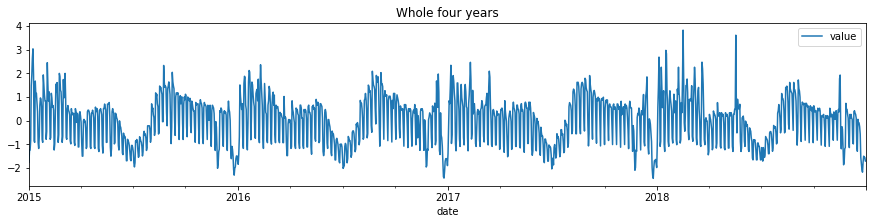

----------------------------------------------------------------------------------------------------
US/School/Secondary school


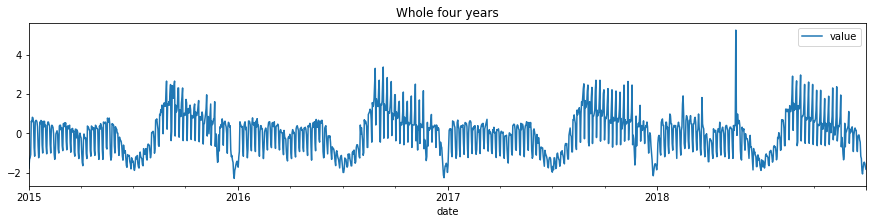

----------------------------------------------------------------------------------------------------
US/School/School district


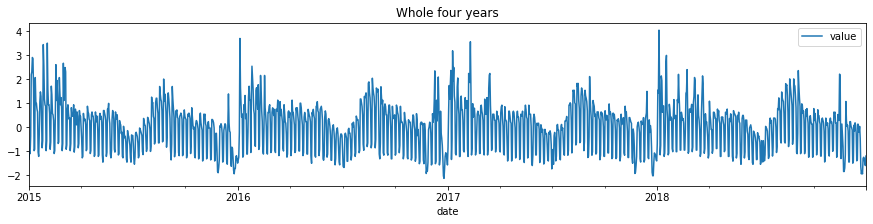

----------------------------------------------------------------------------------------------------
US/School/Primary school


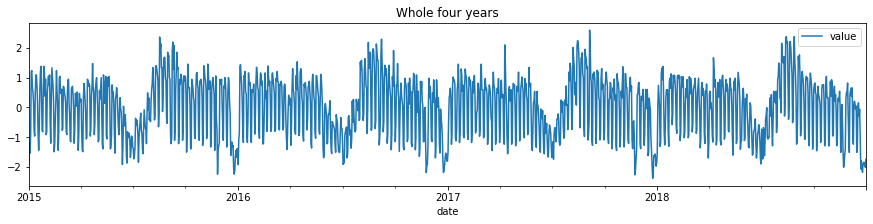

----------------------------------------------------------------------------------------------------
US/School/Middle school


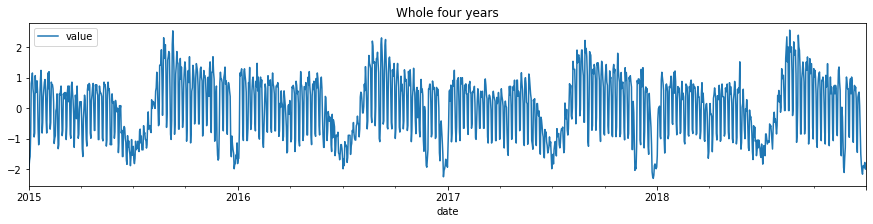

----------------------------------------------------------------------------------------------------
US/Education/Education


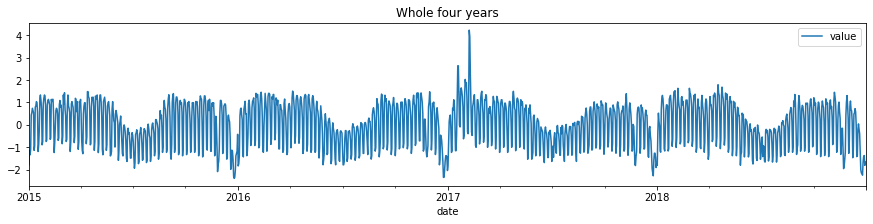

----------------------------------------------------------------------------------------------------
US/Lodging/Lodging


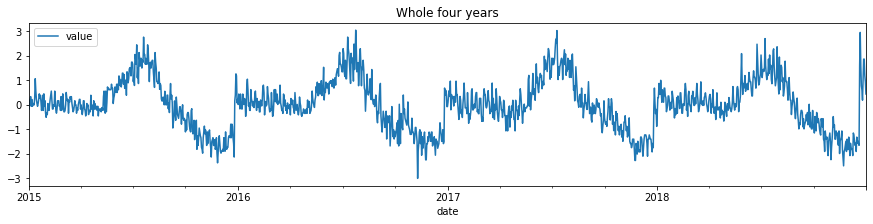

----------------------------------------------------------------------------------------------------
US/Lodging/Boarding house


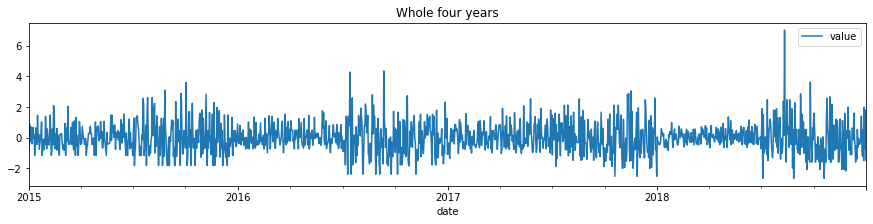

----------------------------------------------------------------------------------------------------
US/Office/Microsoft Office


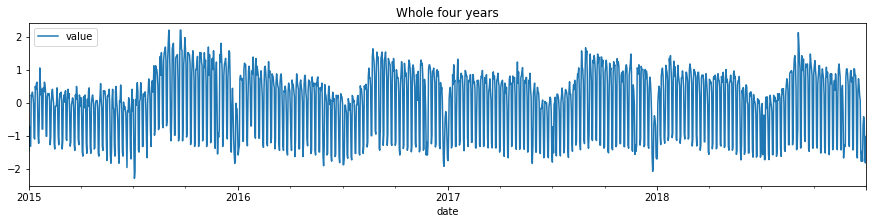

----------------------------------------------------------------------------------------------------
US/Office/Office 365


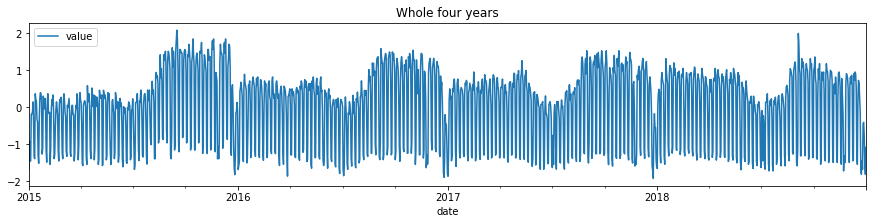

----------------------------------------------------------------------------------------------------
US/Office/Microsoft Outlook


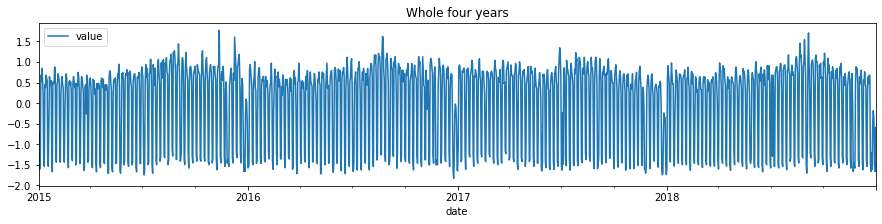

----------------------------------------------------------------------------------------------------
US/Retail/Retail


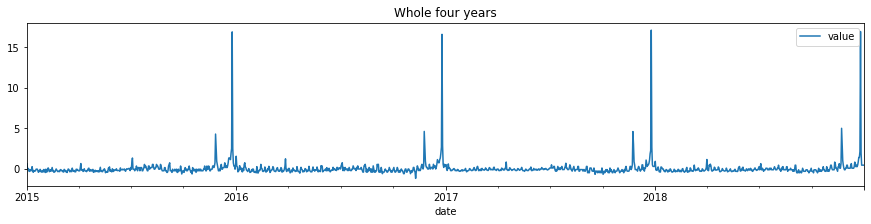

----------------------------------------------------------------------------------------------------
US/Retail/Management


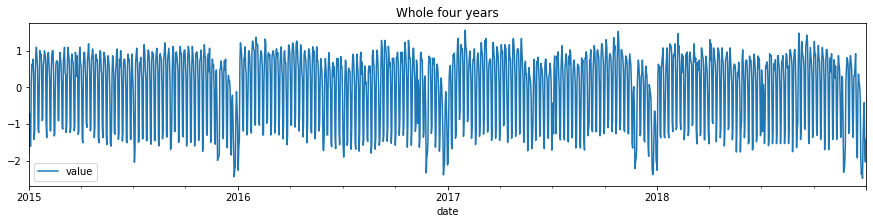

----------------------------------------------------------------------------------------------------
US/Retail/Enterprise


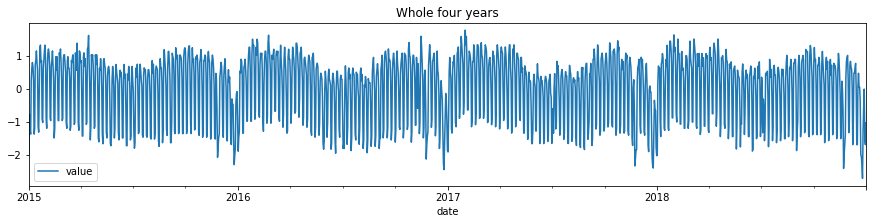

----------------------------------------------------------------------------------------------------
US/Retail/Employment


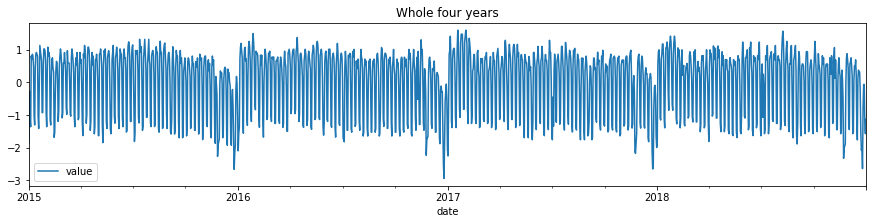

----------------------------------------------------------------------------------------------------
US/Parking/Parking


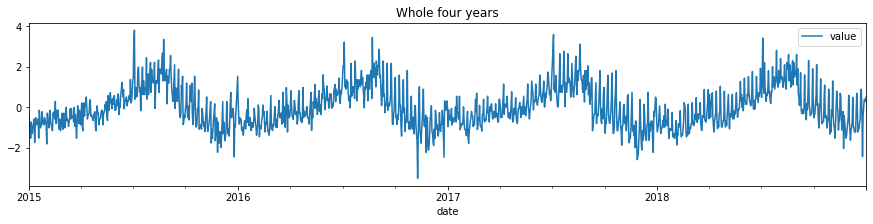

----------------------------------------------------------------------------------------------------
US/Parking/Parking lot


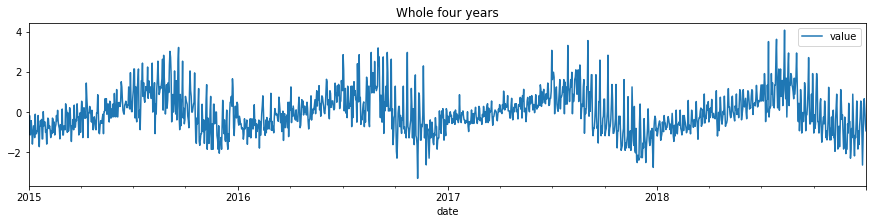

----------------------------------------------------------------------------------------------------
US/Public services/Public service


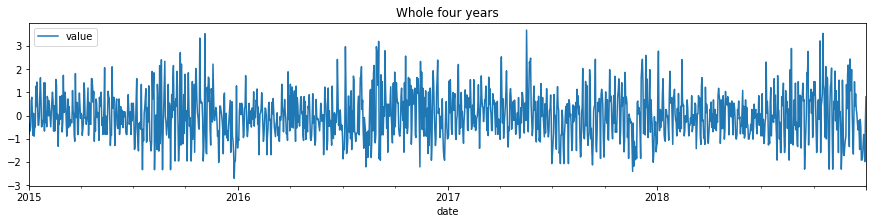

----------------------------------------------------------------------------------------------------
US/Public services/Health Care


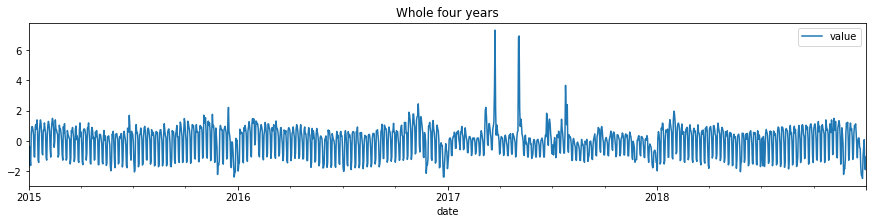

----------------------------------------------------------------------------------------------------
US/Public services/Company


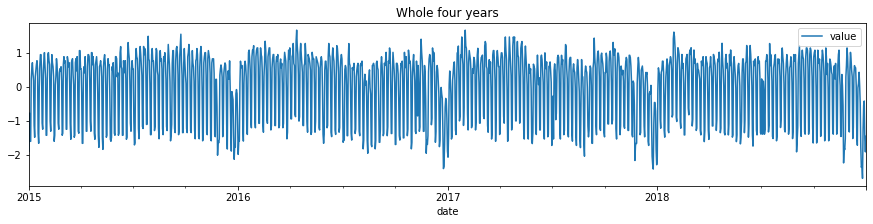

----------------------------------------------------------------------------------------------------
US/Public services/Organization


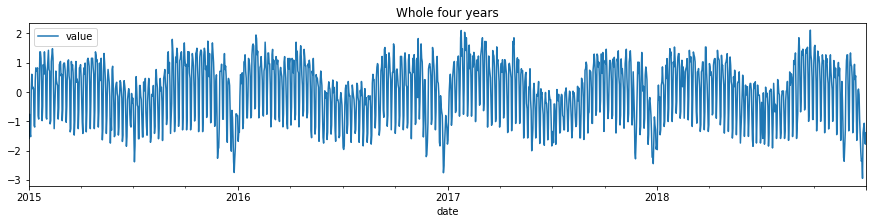

----------------------------------------------------------------------------------------------------
US/Warehouse/Warehouse


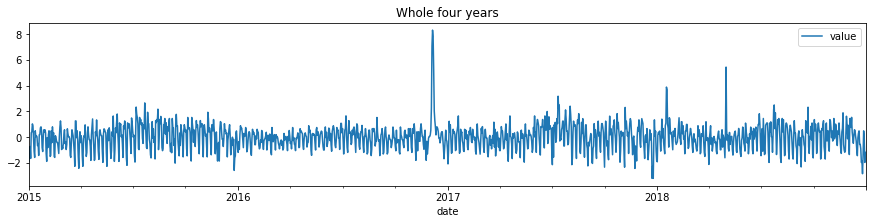

----------------------------------------------------------------------------------------------------
US/Religious worship/Place of worship


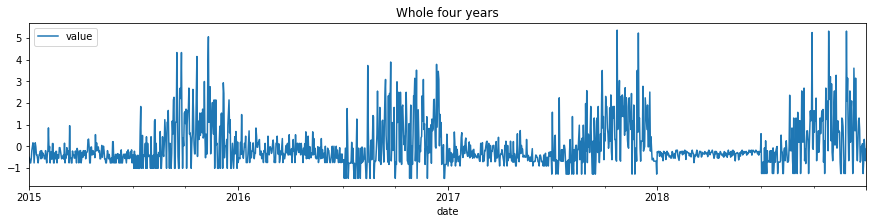

----------------------------------------------------------------------------------------------------
US/Healthcare/Career


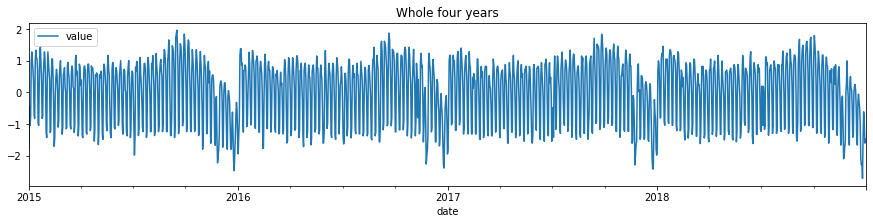

----------------------------------------------------------------------------------------------------
US/Utility/Utility


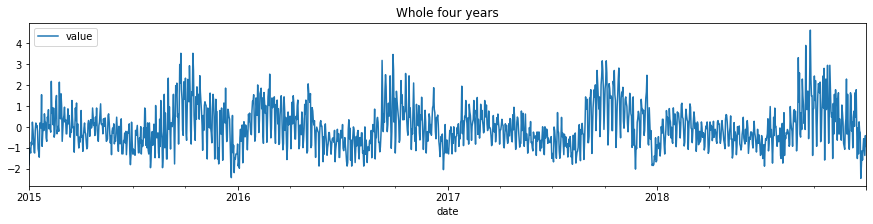

----------------------------------------------------------------------------------------------------
US/Technology/Technology


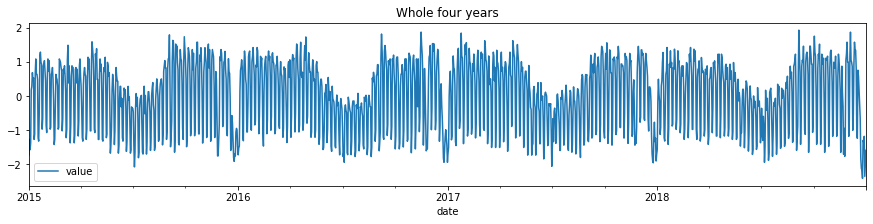

----------------------------------------------------------------------------------------------------
US/Technology/Science


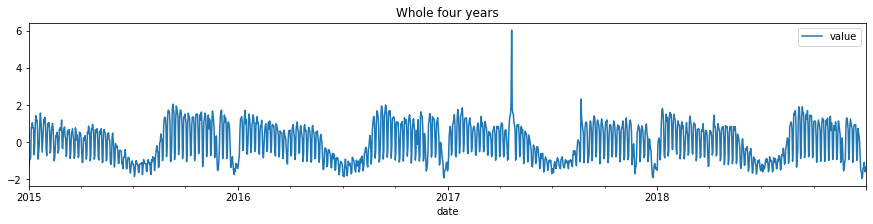

----------------------------------------------------------------------------------------------------
US/Manufacturing/Manufacturing


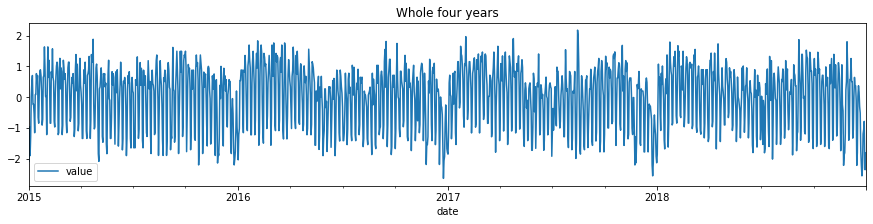

----------------------------------------------------------------------------------------------------
US/residential/Residential building


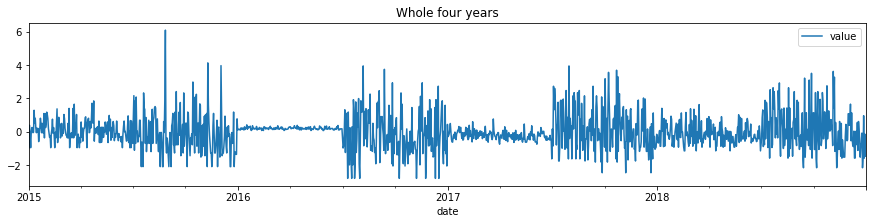

----------------------------------------------------------------------------------------------------
US/storage/storage


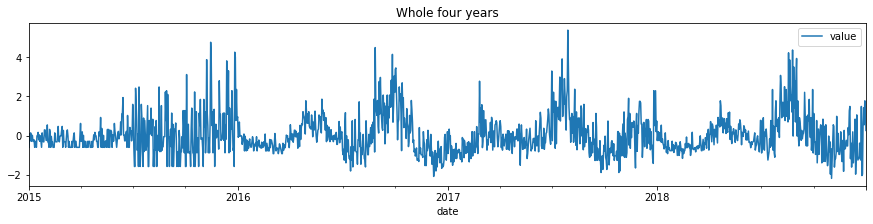

----------------------------------------------------------------------------------------------------
US/microsoft office/Microsoft Excel


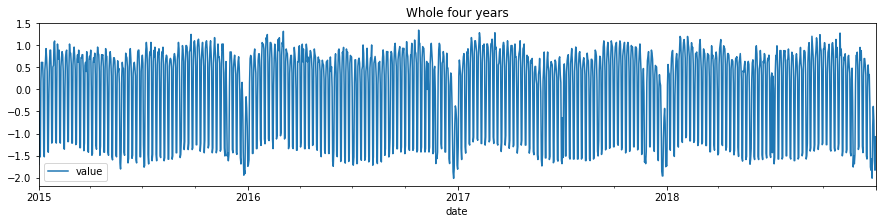

----------------------------------------------------------------------------------------------------
US/Google docs/Google


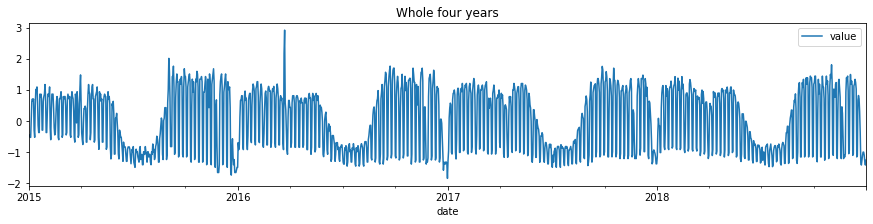

----------------------------------------------------------------------------------------------------
US/Google docs/Google Docs


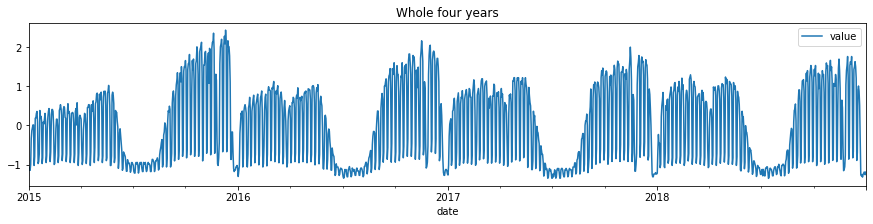

----------------------------------------------------------------------------------------------------
US/Google docs/Google Classroom


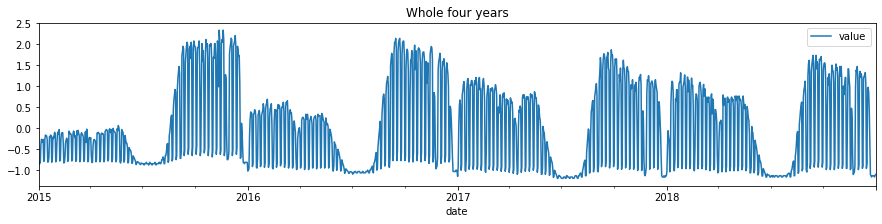

----------------------------------------------------------------------------------------------------
US/Google docs/Google Drive


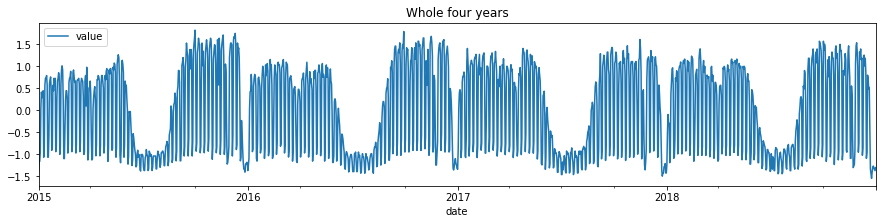

----------------------------------------------------------------------------------------------------
US/Email/Email


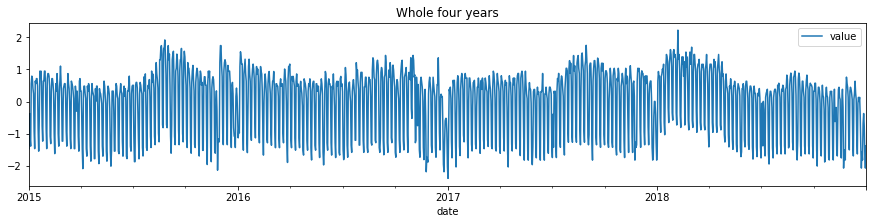

----------------------------------------------------------------------------------------------------
US/Gmail/Gmail


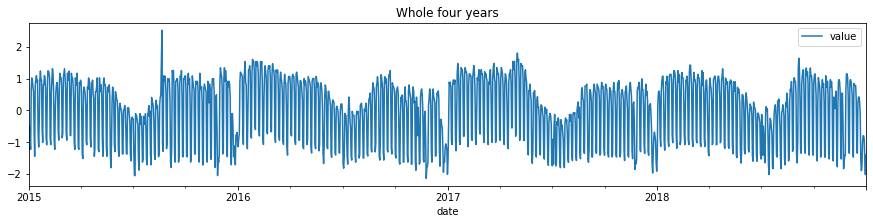

----------------------------------------------------------------------------------------------------


In [9]:
df_trend = pd.DataFrame()

for title, title_type, category, mid in zip(title_list, type_list, category_list, mid_list):
    print(geo_id +'/'+ category +'/'+ title)

    try:    
        for year in ['2015','2016','2017','2018']:
            df_trend_temp = pd.DataFrame()

            pytrends = TrendReq(hl='en-US', tz=360)
            pytrends.build_payload([mid], timeframe= year +'-01-01 ' + year + '-07-01',geo=geo_id,gprop='')
            df_trend_temp_half1 = pytrends.interest_over_time()
            time.sleep(1)

            pytrends = TrendReq(hl='en-US', tz=360)
            pytrends.build_payload([mid], timeframe= year +'-06-01 ' + year + '-12-31',geo=geo_id,gprop='')
            df_trend_temp_half2 = pytrends.interest_over_time()
            time.sleep(1)

            dataset = pd.concat([df_trend_temp_half1.loc[year +'-06-01 ':year +'-07-01 ', mid].rename('X'),
                                 df_trend_temp_half2.loc[year +'-06-01 ':year +'-07-01 ', mid].rename('y')], axis=1).dropna()

            reg_lr = LinearRegression().fit(dataset[['X']], dataset[['y']])

            df_trend_temp_half1[mid] = reg_lr.predict(df_trend_temp_half1[[mid]])

            df_trend_temp = pd.concat([df_trend_temp_half1.loc[year +'-01-01 ':year +'-06-30 '],
                                       df_trend_temp_half2.loc[year +'-07-01 ':year +'-12-31 ']], axis=0)
            df_trend_temp = df_trend_temp[mid].rename('value')
            df_trend_temp = df_trend_temp.reset_index()

            #df_trend_temp.set_index('date').plot(figsize=(15,3), title = title + ' / ' + year)
            #weekly_trend_year.plot(figsize=(15,3))
            #plt.show()

            df_trend_temp['geo_id'] = geo_id
            df_trend_temp['title'] = title
            df_trend_temp['type'] = title_type
            df_trend_temp['category'] = category
            df_trend_temp['year'] = year

            df_trend_temp['value'] = (df_trend_temp['value']-df_trend_temp['value'].mean())/df_trend_temp['value'].std()

            df_trend = pd.concat([df_trend, df_trend_temp], axis=0, ignore_index=True)

        df_trend.loc[(df_trend['geo_id']==geo_id)&(df_trend['title']==title)].set_index('date').plot(figsize=(15,3), title = 'Whole four years')
        plt.show()

        print('----------------------------------------------------------------------------------------------------')


    except:
        print('error')

In [10]:
df_trend.sort_values(['geo_id','category','title','date']).to_csv('all_trends_'+geo_id+'.csv', index=False)
df_trend

,date,value,geo_id,title,type,category,year
0,2015-01-01,-1.759849,US,School,Topic,School,2015
1,2015-01-02,-1.241604,US,School,Topic,School,2015
2,2015-01-03,-1.241604,US,School,Topic,School,2015
3,2015-01-04,-0.852919,US,School,Topic,School,2015
4,2015-01-05,1.479187,US,School,Topic,School,2015
...,...,...,...,...,...,...,...
54052,2018-12-27,-0.800966,US,Gmail,Topic,Gmail,2018
54053,2018-12-28,-0.922928,US,Gmail,Topic,Gmail,2018
54054,2018-12-29,-1.593721,US,Gmail,Topic,Gmail,2018
54055,2018-12-30,-2.020589,US,Gmail,Topic,Gmail,2018
